In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction
The goal of this project is to analyse the Breast Histology Images obtained from <a href="https://www.kaggle.com/datasets/simjeg/lymphoma-subtype-classification-fl-vs-cll"> Kaggle </a> and classify them as a way of predicting cancerous and non-cancerous images. The images consist of Invasive Ductal Carcinoma (IDC) which are cancerous images and Non-Invasive Ductal Carcinoma (Non-IDC) images. The two deep learning models that will be used for classification are:
1. Multi-Layer Perceptron (MLP)
2. Convolution Neural Networks (CNN)

In [2]:
X = np.load("./data/X.npy")
y = np.load("./data/Y.npy")

## Properties of the data and the images
As stated above and having investigated the data, we see that there are 5547 images for classification, and each image has a height of 50 pixels and width of 50 pixels each with three color channels, RGB (Red, Green, Blue). The information about the shape of the dataset can be obtained using `numpy.array.shape` which is an attribute of a NumPy array.

In [3]:
print(f"There are {X.shape[0]} images for classification.")
print(f"Each image has: \n\t1.Height: {X.shape[1]}px\n\t2.Width : {X.shape[2]}px\n\t3.Color Channels: {X.shape[3]}")

There are 5547 images for classification.
Each image has: 
	1.Height: 50px
	2.Width : 50px
	3.Color Channels: 3


## Checking the number of IDC and non-IDC images in the dataset
- Imbalance check

IDC     : 2788 Images >> 50.26% 
Non-IDC : 2759 Images >> 49.74% 


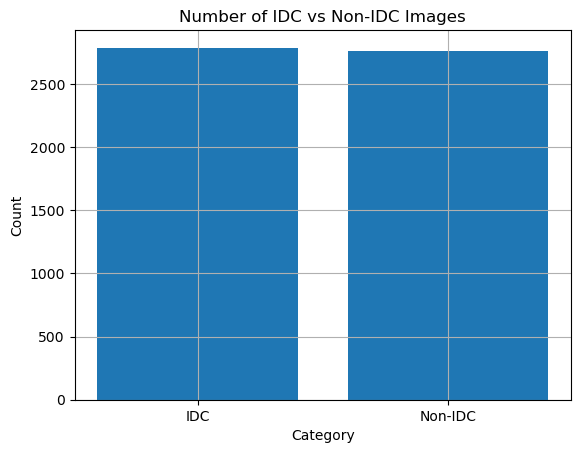

In [4]:
print(f"IDC     : {X[y==1].shape[0]} Images >> {(X[y==1].shape[0]/X.shape[0])*100:.2f}% ")
print(f"Non-IDC : {X[y==0].shape[0]} Images >> {(X[y==0].shape[0]/X.shape[0])*100:.2f}% ")

# Visualizing
plt.bar(["IDC", "Non-IDC"], [X[y==1].shape[0], X[y==0].shape[0]])
plt.title("Number of IDC vs Non-IDC Images")
plt.xlabel("Category") # X axis label
plt.ylabel("Count")    # y axis label
plt.grid()
plt.show()

## Visualising IDC and Non-IDC Images

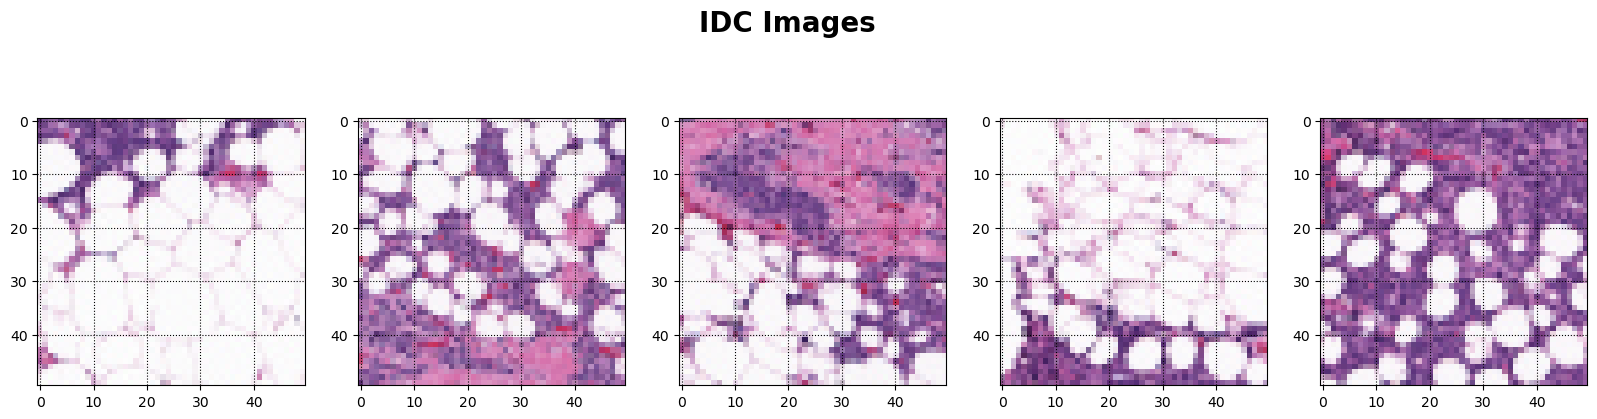

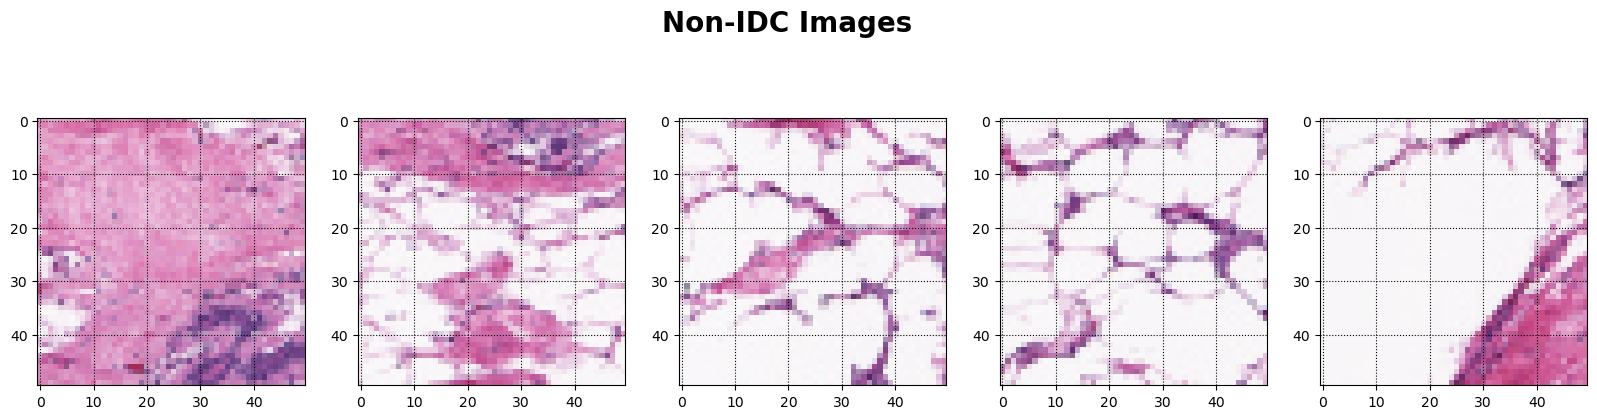

In [64]:
# Visualize 5 IDC Images and 5 Non-IDC images
# IDC Images
fig, ax = plt.subplots(nrows=1, ncols = 5, figsize = (20, 5))
for i,mat in enumerate(X[y==1][5:10]):
    ax[i].imshow(mat)
    ax[i].grid(linestyle = 'dotted', color = "black") # Add a dotted gridline
fig.suptitle("IDC Images", fontsize = 20, fontweight = 'bold') # Add title to the figure
plt.show()

# NON-IDC Images
fig, ax1 = plt.subplots(nrows=1, ncols = 5, figsize = (20, 5))
for i,mat in enumerate(X[y==0][:5]):
    ax1[i].imshow(mat)
    ax1[i].grid(linestyle = 'dotted', color = "black") # Add a dotted gridline
fig.suptitle("Non-IDC Images", fontsize = 20, fontweight = 'bold') # Figure title
plt.show()

# Preprocessing the Data & Model Selection
- Preprocessing the Image Data
- Converting the Labels to One Hot Vector
- Splitting the Data into Train and Test Sets

In [6]:
# Scale the data to be between 0 and 1
Xs = X / 255

# Display a sample of the scaled data
print(Xs[0,0,:4,:])

# Convert the y labels to a vector of one hot class
from keras.utils import np_utils
ye = np_utils.to_categorical(y, num_classes = 2)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, ye, test_size = 0.15, random_state = 50)

# Display the shape of the Train and test sets
print("\nTrain and Test Data Info")
print("X Train Set:",X_train.shape)
print("y Train Set:",y_train.shape)
print("X Test Set :",X_test.shape)
print("y Test Set :",y_test.shape)

[[0.88627451 0.64313725 0.80784314]
 [0.87843137 0.60392157 0.76862745]
 [0.88235294 0.68627451 0.82745098]
 [0.88235294 0.68235294 0.82352941]]

Train and Test Data Info
X Train Set: (4714, 50, 50, 3)
y Train Set: (4714, 2)
X Test Set : (833, 50, 50, 3)
y Test Set : (833, 2)


# Building, Training, and Validating the Models
## MLP
**Multilayer Perceptron** 
- feedforward artificial neural network 
- input nodes with several layers that are conjoined together in the form of a directed graph
- employs the supervised learning technique known as backpropagation 
- MLP takes vectors as inputs meaning that matrices will be flattened into vectors.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelMLP = Sequential()
modelMLP.add(Dense(400, activation='relu', input_shape = (7500, ))) # input shape flatten (50 by 50 by 3), max(0, x)
modelMLP.add(Dense(200, activation='relu'))
modelMLP.add(Dense(2, activation='softmax')) # Number of output classes are 2

# Compile the model
modelMLP.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# View the model summary
print("Model Summary")
print(modelMLP.summary())

# Train the model
print("\nModel Training")
historym1 = modelMLP.fit(X_train.reshape(4714, 7500), y_train, validation_split = 0.33, epochs = 20, batch_size = 20)

# Evaluating the MLP model on the test set.
loss, accuracy = modelMLP.evaluate(X_test.reshape(833, 7500), y_test, verbose = 0)
print(f"\nMLP accuracy on the test set: {accuracy*100:.2f}%")

Model Summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               3000400   
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 3,081,002
Trainable params: 3,081,002
Non-trainable params: 0
_________________________________________________________________
None

Model Training
Epoch 1/20
158/158 [==============================] - 4s 23ms/step - loss: 0.7968 - accuracy: 0.5833 - val_loss: 0.6156 - val_accuracy: 0.6870
Epoch 2/20
158/158 [==============================] - 3s 22ms/step - loss: 0.6559 - accuracy: 0.6314 - val_loss: 0.5980 - val_accura

## CNN
- Convolutional Layer, Pooling Layer, and Fully Connected Layer.
- accepts tensors as inputs 
- complexity of the CNN's layers increase allows it to evaluate more complex features thus making it more accurate.

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building the CNN model with several alternating stacks /> Conv & pooling
modelCNN = Sequential()
modelCNN.add(Conv2D(25, (3, 3), activation = 'relu', input_shape = (50, 50, 3))) # 50px by 50px
modelCNN.add(MaxPooling2D((2, 2))) # Summarize input to smaller output
modelCNN.add(Conv2D(50, (3, 3), activation = 'relu'))
modelCNN.add(MaxPooling2D((2, 2)))
modelCNN.add(Conv2D(100, (3, 3), activation = 'relu'))
modelCNN.add(MaxPooling2D((2, 2)))
modelCNN.add(Flatten())
modelCNN.add(Dense(200, activation = 'relu'))
modelCNN.add(Dense(2, activation = 'softmax'))

# Compile the model
modelCNN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# View the model summary
print("Model Summary")
print(modelCNN.summary())

# Train the model
print("\nModel Training")
historyc1 = modelCNN.fit(X_train, y_train, validation_split = 0.33, epochs = 20, batch_size = 20)

# Evaluating the MLP model on the test set.
loss1, accuracy1 = modelCNN.evaluate(X_test, y_test, verbose = 0)
print(f"\nMLP accuracy on the test set: {accuracy1*100:.2f}%")

Model Summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 25)        700       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 100)         45100     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 

# Hyperparameter-Tuning
- Tuning MLP

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define a function that takes parameters to tune the model
def MLP_tune(neurons1 = 400, neurons2 = 200, activation = 'relu', optimizer='adam'):
    """
    This function will accept different parameters for the MLP model for tuning
    """
    model = Sequential()
    model.add(Dense(neurons1, activation=activation, input_shape = (7500,)))
    model.add(Dense(neurons2, activation=activation))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier object
modelMLP1 = KerasClassifier(build_fn = MLP_tune)

# State the parameter grid
params_grid = {
    'neurons1' : [200, 400, 800],
    'neurons2' : [100, 200, 300],
    'optimizer' : ['sgd', 'adam'],
    'batch_size' : [20, 40],
    'epochs' : [20, 30]
}

# Using the RandomizedCV
random_MLP_search = RandomizedSearchCV(estimator = modelMLP1,
                                      param_distributions = params_grid,
                                      n_iter = 5,
                                      cv = 3,
                                      n_jobs = -1)

#fit random_MLP_search on data
print("Starting Fitting--->")
random_MLP_search.fit(X_train.reshape(4714, 7500),y_train)
print("--->Done Fitting")

#Display best parameters and score
print(random_MLP_search.best_params_)
print(random_MLP_search.best_score_)

Starting Fitting--->


K:\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  app.launch_new_instance()


Epoch 1/20
118/118 [==============================] - 2s 13ms/step - loss: 0.8098 - accuracy: 0.5800
Epoch 2/20
118/118 [==============================] - 2s 13ms/step - loss: 0.6396 - accuracy: 0.6404
Epoch 3/20
118/118 [==============================] - 2s 14ms/step - loss: 0.6001 - accuracy: 0.6841
Epoch 4/20
118/118 [==============================] - 2s 14ms/step - loss: 0.5937 - accuracy: 0.6913
Epoch 5/20
118/118 [==============================] - 2s 14ms/step - loss: 0.5845 - accuracy: 0.7070
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5846 - accuracy: 0.7005
Epoch 7/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5782 - accuracy: 0.7062
Epoch 8/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5617 - accuracy: 0.7289
Epoch 9/20
118/118 [==============================] - 2s 14ms/step - loss: 0.5433 - accuracy: 0.7353
Epoch 10/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5300 - accura

- Tuning CNN

In [10]:
def CNN_tune(n_filters=25, kernel_size = 3, activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    model.add(Conv2D(n_filters, (kernel_size, kernel_size), activation = activation, input_shape = (50, 50, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# KerasClassifier object
modelCNN1 = KerasClassifier(build_fn = CNN_tune)

# State the parameter grid
params_grid1 = {
    'n_filters' : [25, 50, 100],
    'kernel_size' : [3, 5],
    'optimizer' : ['sgd', 'adam'],
    'batch_size' : [20, 40],
    'epochs' : [10, 20]
}

# Using the RandomizedCV
random_CNN_search = RandomizedSearchCV(estimator = modelCNN1,
                                      param_distributions = params_grid1,
                                      n_iter = 3,
                                      cv = 3,
                                      n_jobs = -1)

#fit random_CNN_search on data
print("Starting Fitting--->")
random_CNN_search.fit(X_train, y_train)
print("--->Done Fitting")

#Display best parameters and score
print(random_CNN_search.best_params_)
print(random_CNN_search.best_score_)

Starting Fitting--->


K:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
118/118 [==============================] - 16s 131ms/step - loss: 0.6853 - accuracy: 0.5634
Epoch 2/20
118/118 [==============================] - 16s 135ms/step - loss: 0.6337 - accuracy: 0.6502
Epoch 3/20
118/118 [==============================] - 15s 129ms/step - loss: 0.6128 - accuracy: 0.6703
Epoch 4/20
118/118 [==============================] - 15s 130ms/step - loss: 0.5962 - accuracy: 0.6882
Epoch 5/20
118/118 [==============================] - 15s 129ms/step - loss: 0.5898 - accuracy: 0.6962
Epoch 6/20
118/118 [==============================] - 16s 137ms/step - loss: 0.5761 - accuracy: 0.7106
Epoch 7/20
118/118 [==============================] - 15s 129ms/step - loss: 0.5690 - accuracy: 0.7140
Epoch 8/20
118/118 [==============================] - 15s 129ms/step - loss: 0.5667 - accuracy: 0.7157
Epoch 9/20
118/118 [==============================] - 15s 130ms/step - loss: 0.5547 - accuracy: 0.7300
Epoch 10/20
118/118 [==============================] - 16s 138ms/step - l

# Evaluating the Models on the Metrics

- Precision, Recall, and F1 Score

In [23]:
from sklearn.metrics import classification_report

print("MLP Classification Report")
# Predicting on the test set
y_predMLP = random_MLP_search.predict(X_test.reshape(833, 7500))
reportMLP = classification_report(np.argmax(y_test, axis = 1), y_predMLP) # From categorical 2D to 1 D
print(reportMLP)

print("\nCNN Classification Report")
# Predicting on the test set
y_predCNN = random_CNN_search.predict(X_test)
reportCNN = classification_report(np.argmax(y_test, axis = 1), y_predCNN) # From categorical 2D to 1 D
print(reportCNN)

MLP Classification Report
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       408
           1       0.79      0.63      0.70       425

    accuracy                           0.73       833
   macro avg       0.74      0.73      0.73       833
weighted avg       0.74      0.73      0.72       833


CNN Classification Report
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       408
           1       0.80      0.61      0.69       425

    accuracy                           0.72       833
   macro avg       0.74      0.73      0.72       833
weighted avg       0.74      0.72      0.72       833



# Visualisations
1. ROC Curve
2. PR Curve
3. Confusion Matrix

## ROC Curve

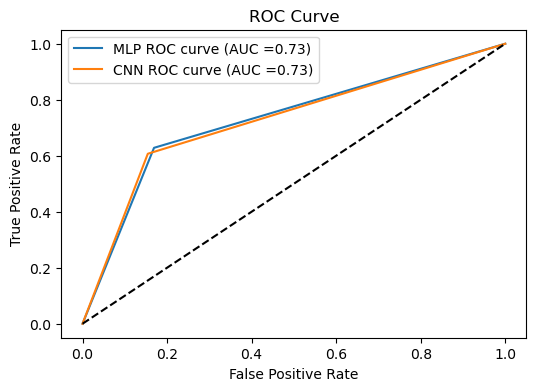

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
y_test_ = np.argmax(y_test, axis = 1) # To 1D

# Find the ROC and AUC
### MLP
fprMLP, tprMLP, thresholdMLP = roc_curve(y_test_, y_predMLP)
aucMLP = roc_auc_score(y_test_, y_predMLP)

### CNN
fprCNN, tprCNN, thresholdCNN = roc_curve(y_test_, y_predCNN)
aucCNN = roc_auc_score(y_test_, y_predCNN)

# Plot ROC curve for both models 
plt.figure(figsize=(6, 4))
plt.plot(fprMLP, tprMLP, label=f'MLP ROC curve (AUC ={aucMLP:.2f})')
plt.plot(fprCNN, tprCNN, label=f'CNN ROC curve (AUC ={aucCNN:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## PR Curve

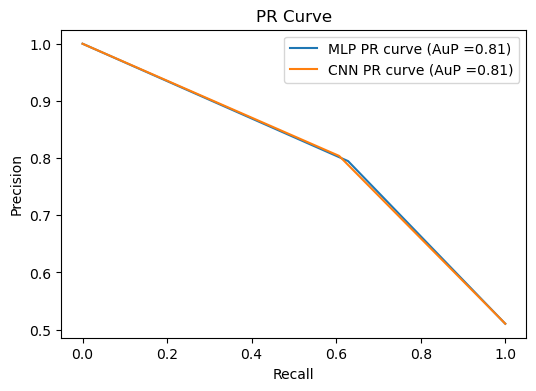

In [38]:
# Find the Precisions and Recall
pMLP, rMLP, tholdMLP = precision_recall_curve(y_test_, y_predMLP)
apMLP = np.trapz(pMLP[::-1], rMLP[::-1]) # area under the precision-recall curve
pCNN, rCNN, tholdCNN = precision_recall_curve(y_test_, y_predCNN)
apCNN = np.trapz(pCNN[::-1], rCNN[::-1]) # area under the precision-recall curve

# Plot PR curve for both models 
plt.figure(figsize=(6, 4))
plt.plot(rMLP, pMLP, label=f'MLP PR curve (AuP ={apMLP:.2f})')
plt.plot(rCNN, pCNN, label=f'CNN PR curve (AuP ={apCNN:.2f})')
plt.xlabel('Recall'), plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()
plt.show()

## Confusion Matrix

MLP Confusion Matrix


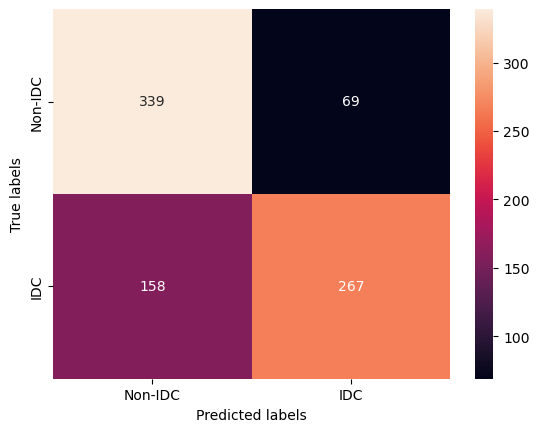


CNN Confusion Matrix


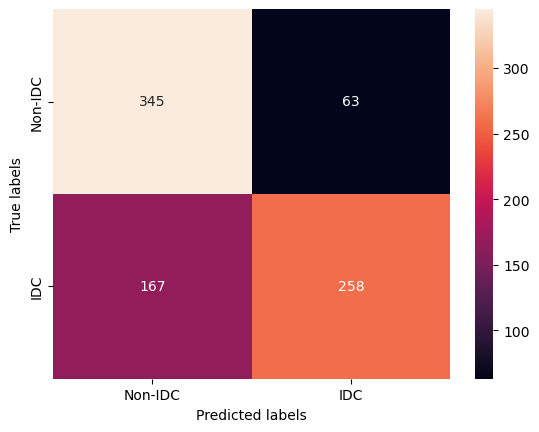

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# MLP
print("MLP Confusion Matrix")
cmMLP = confusion_matrix(y_test_, y_predMLP)
sns.heatmap(cmMLP, annot = True, fmt = 'g')
plt.xticks([0.5, 1.5], labels = ['Non-IDC', 'IDC']), plt.yticks([1.5, 0.5], labels = ['IDC', 'Non-IDC'])
plt.xlabel('Predicted labels'), plt.ylabel('True labels')
plt.show()

# CNN
print("\nCNN Confusion Matrix")
cmCNN = confusion_matrix(y_test_, y_predCNN)
sns.heatmap(cmCNN, annot = True, fmt = 'g')
plt.xticks([0.5, 1.5], labels = ['Non-IDC', 'IDC']), plt.yticks([1.5, 0.5], labels = ['IDC', 'Non-IDC'])
plt.xlabel('Predicted labels'), plt.ylabel('True labels')
plt.show()